### Pass Progression Insights - Manchester City vs Tottenham
#### by Ana De Souza and Ope Bonarin

#### Problem Statement :

##### We want to know what Manchester City Women are doing with the ball building an attack from different zones on the pitch (4 Zones) and how efficient they are to get desired outcomes:

1. Exploratory Data Analysis
2. Data Cleaning
3. Dividing the pitch into four (4) quarters, with their respective 'start_zone' and 'end_zone'
4. Quarter labels would be from left to right, left being where the goalkeeper is, 1: 'defensive', 2:'predefensive', 3:'preoffensive', 4:'offensive'
5. Add a points system to determine who has the most impactful passing
6. Data Visualization

#### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch

# Load JSON data
with open('ManCity_Tottenham_events.json', 'r') as f:
    data = json.load(f)

# Convert JSON to a pandas DataFrame
events = pd.json_normalize(data)

# Save DataFrame to CSV file
events.to_csv('ManCity_Tottenham_events.csv', index=False)

In [2]:
events.head()

,id,index,period,timestamp,minute,second,possession,obv_for_after,obv_for_before,obv_for_net,...,shot.one_on_one,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,miscontrol.aerial_won,pass.cut_back,injury_stoppage.in_chain,shot.deflected,block.deflection
0,f887633b-6105-405b-b2ce-8d63ef617498,1,1,00:00:00.000,0,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6c650a51-cfe9-4214-909f-2328c643349a,2,1,00:00:00.000,0,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,69c37df1-290a-4429-92a3-fbac21a133b9,3,1,00:00:00.000,0,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9771e240-fc05-4448-b7a6-2364c6555dde,4,1,00:00:00.000,0,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b81dcf83-537d-4f17-8f34-abb38d2dce13,5,1,00:00:00.194,0,0,2,0.016658,0.006829,0.00983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
events.dtypes

id                          object
index                        int64
period                       int64
timestamp                   object
minute                       int64
                             ...  
miscontrol.aerial_won       object
pass.cut_back               object
injury_stoppage.in_chain    object
shot.deflected              object
block.deflection            object
Length: 124, dtype: object

In [4]:
#Player = 'player.name'
#Receipt = 'pass.recipient.name'
#Location Data = 'location'
#Phase of play = 'play_pattern.name'
#Kind of play = 'type.name'
#Time = 'timestamp'
#Pass End Location = 'pass.end_location'
#Carry End Location = 'carry.end_location'
#Pass Height
#Pressure = 'under_pressure'
#Body Part = 'pass.body_part.name'
#Counter Press = 'counterpress'
#Crossing = 'pass.cross'
#Pass Outcome = 'pass.outcome.name'
#Receipt Outcome = 'ball_receipt.outcome.outcome'
#xG = 'shot.statsbomb_xg'
#Shot Technique = 'shot.technique.name'
#Position = 'position.name'
#Team = 'team.name'

In [5]:
# Drop the Columns we will omit during our project
events.drop(events.columns.difference(['player.name','pass.recipient.name','location','play_pattern.name','type.name','timestamp','pass.end_location','carry.end_location','under_pressure','pass.body_part.name','counterpress','pass.cross','pass.outcome.name','shot.technique.name','position.name','team.name']), 1, inplace=True)

/var/folders/kg/wd_xvs4n3c39wz1x4mt6wfhh0000gn/T/ipykernel_4930/864936705.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  events.drop(events.columns.difference(['player.name','pass.recipient.name','location','play_pattern.name','type.name','timestamp','pass.end_location','carry.end_location','under_pressure','pass.body_part.name','counterpress','pass.cross','pass.outcome.name','shot.technique.name','position.name','team.name']), 1, inplace=True)


In [6]:
events.head()

,timestamp,type.name,play_pattern.name,team.name,location,player.name,position.name,pass.recipient.name,pass.end_location,pass.body_part.name,carry.end_location,pass.outcome.name,pass.cross,shot.technique.name,under_pressure,counterpress
0,00:00:00.000,Starting XI,Regular Play,Manchester City WFC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00:00:00.000,Starting XI,Regular Play,Tottenham Hotspur Women,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00:00:00.000,Half Start,Regular Play,Tottenham Hotspur Women,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00:00:00.000,Half Start,Regular Play,Manchester City WFC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00:00:00.194,Pass,From Kick Off,Tottenham Hotspur Women,"[61.0, 40.1]",Nikola Karczewska,Center Forward,Drew Spence,"[51.1, 44.6]",Right Foot,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
events.dtypes

timestamp              object
type.name              object
play_pattern.name      object
team.name              object
location               object
player.name            object
position.name          object
pass.recipient.name    object
pass.end_location      object
pass.body_part.name    object
carry.end_location     object
pass.outcome.name      object
pass.cross             object
shot.technique.name    object
under_pressure         object
counterpress           object
dtype: object

In [8]:
location = events['location'].dropna()

In [9]:
pas_loc = events['pass.end_location'].dropna()

In [10]:
passing = pd.merge(location, pas_loc, right_index = True, left_index = True)

In [11]:
passing = pd.merge(passing, events, right_index = True, left_index = True)

In [12]:
passing = passing.drop(columns = ['location_y', 'pass.end_location_y'])

In [13]:
passing = passing.rename(columns={"location_x": "location", "pass_end_location_x": "pass.end_location"})

In [14]:
passing.head()

,location,pass.end_location_x,timestamp,type.name,play_pattern.name,team.name,player.name,position.name,pass.recipient.name,pass.body_part.name,carry.end_location,pass.outcome.name,pass.cross,shot.technique.name,under_pressure,counterpress
4,"[61.0, 40.1]","[51.1, 44.6]",00:00:00.194,Pass,From Kick Off,Tottenham Hotspur Women,Nikola Karczewska,Center Forward,Drew Spence,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN
7,"[50.8, 45.6]","[34.8, 50.8]",00:00:01.691,Pass,From Kick Off,Tottenham Hotspur Women,Drew Spence,Right Defensive Midfield,Molly Bartrip,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN
10,"[34.5, 51.0]","[36.1, 65.0]",00:00:03.965,Pass,From Kick Off,Tottenham Hotspur Women,Molly Bartrip,Center Back,Amy Turner,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN
13,"[36.1, 65.0]","[47.7, 52.2]",00:00:05.751,Pass,From Kick Off,Tottenham Hotspur Women,Amy Turner,Right Center Back,Drew Spence,Right Foot,NaN,Incomplete,NaN,NaN,NaN,NaN
17,"[77.8, 14.7]","[85.9, 4.0]",00:00:09.938,Pass,Regular Play,Manchester City WFC,Ingrid Filippa Angeldal,Right Center Midfield,Lauren Hemp,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
location = pd.DataFrame(passing['location'].to_list(), columns = ['loc_x', 'loc_y'], index = passing.index)
pass_location = pd.DataFrame(passing['pass.end_location_x'].to_list(), columns = ['pass_x', 'pass_y'], index = passing.index)

In [16]:
df = pd.concat([passing, location, pass_location], axis=1)
df.head()

,location,pass.end_location_x,timestamp,type.name,play_pattern.name,team.name,player.name,position.name,pass.recipient.name,pass.body_part.name,carry.end_location,pass.outcome.name,pass.cross,shot.technique.name,under_pressure,counterpress,loc_x,loc_y,pass_x,pass_y
4,"[61.0, 40.1]","[51.1, 44.6]",00:00:00.194,Pass,From Kick Off,Tottenham Hotspur Women,Nikola Karczewska,Center Forward,Drew Spence,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,61.0,40.1,51.1,44.6
7,"[50.8, 45.6]","[34.8, 50.8]",00:00:01.691,Pass,From Kick Off,Tottenham Hotspur Women,Drew Spence,Right Defensive Midfield,Molly Bartrip,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,50.8,45.6,34.8,50.8
10,"[34.5, 51.0]","[36.1, 65.0]",00:00:03.965,Pass,From Kick Off,Tottenham Hotspur Women,Molly Bartrip,Center Back,Amy Turner,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,34.5,51.0,36.1,65.0
13,"[36.1, 65.0]","[47.7, 52.2]",00:00:05.751,Pass,From Kick Off,Tottenham Hotspur Women,Amy Turner,Right Center Back,Drew Spence,Right Foot,NaN,Incomplete,NaN,NaN,NaN,NaN,36.1,65.0,47.7,52.2
17,"[77.8, 14.7]","[85.9, 4.0]",00:00:09.938,Pass,Regular Play,Manchester City WFC,Ingrid Filippa Angeldal,Right Center Midfield,Lauren Hemp,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,77.8,14.7,85.9,4.0


#### Data Cleaning

In [17]:
space = np.zeros((8, 12))
space_rows, space_cols = space.shape
space

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
print(space_rows,space_cols)

8 12


In [19]:
df['x1_bin'] = pd.cut(df['loc_x'], bins=space_cols, labels=False)
df['y1_bin'] = pd.cut(df['loc_y'], bins=space_rows, labels=False)
df['x2_bin'] = pd.cut(df['pass_x'], bins=space_cols, labels=False)
df['y2_bin'] = pd.cut(df['pass_y'], bins=space_rows, labels=False)

In [20]:
df.head(5)

,location,pass.end_location_x,timestamp,type.name,play_pattern.name,team.name,player.name,position.name,pass.recipient.name,pass.body_part.name,...,under_pressure,counterpress,loc_x,loc_y,pass_x,pass_y,x1_bin,y1_bin,x2_bin,y2_bin
4,"[61.0, 40.1]","[51.1, 44.6]",00:00:00.194,Pass,From Kick Off,Tottenham Hotspur Women,Nikola Karczewska,Center Forward,Drew Spence,Right Foot,...,NaN,NaN,61.0,40.1,51.1,44.6,5,4,4,4
7,"[50.8, 45.6]","[34.8, 50.8]",00:00:01.691,Pass,From Kick Off,Tottenham Hotspur Women,Drew Spence,Right Defensive Midfield,Molly Bartrip,Right Foot,...,NaN,NaN,50.8,45.6,34.8,50.8,4,4,3,5
10,"[34.5, 51.0]","[36.1, 65.0]",00:00:03.965,Pass,From Kick Off,Tottenham Hotspur Women,Molly Bartrip,Center Back,Amy Turner,Right Foot,...,NaN,NaN,34.5,51.0,36.1,65.0,3,5,3,6
13,"[36.1, 65.0]","[47.7, 52.2]",00:00:05.751,Pass,From Kick Off,Tottenham Hotspur Women,Amy Turner,Right Center Back,Drew Spence,Right Foot,...,NaN,NaN,36.1,65.0,47.7,52.2,3,6,4,5
17,"[77.8, 14.7]","[85.9, 4.0]",00:00:09.938,Pass,Regular Play,Manchester City WFC,Ingrid Filippa Angeldal,Right Center Midfield,Lauren Hemp,Right Foot,...,NaN,NaN,77.8,14.7,85.9,4.0,7,1,8,0


#### Dividing the pitch into four (4) quarters with their respective 'start_zone' and 'end_zone' and Label Quarters

In [21]:
# def_zone = bin 1,2,3
# predef_zone = bin 4,5,6
# preoff_zone = bin 7,8,9
# off_zone = 10,11,12
bins = [-1,4,7,10,12]
labels = ['def_zone', 'predef_zone','preoff_zone','off_zone']
df['start_zone'] = pd.cut(df['x1_bin'], bins=bins, labels=labels)
df['end_zone'] = pd.cut(df['x2_bin'], bins=bins, labels=labels)

In [22]:
df.sort_values('x1_bin', ascending = True)

,location,pass.end_location_x,timestamp,type.name,play_pattern.name,team.name,player.name,position.name,pass.recipient.name,pass.body_part.name,...,loc_x,loc_y,pass_x,pass_y,x1_bin,y1_bin,x2_bin,y2_bin,start_zone,end_zone
3774,"[5.0, 45.5]","[26.8, 41.7]",00:50:42.943,Pass,From Goal Kick,Manchester City WFC,Ellie Roebuck,Goalkeeper,NaN,Right Foot,...,5.0,45.5,26.8,41.7,0,4,2,4,def_zone,def_zone
2726,"[12.5, 45.5]","[16.5, 0.1]",00:24:13.535,Pass,Regular Play,Tottenham Hotspur Women,Angharad James,Left Defensive Midfield,Kit Graham,Right Foot,...,12.5,45.5,16.5,0.1,0,4,1,0,def_zone,def_zone
1010,"[6.0, 36.0]","[10.6, 50.4]",00:24:52.773,Pass,From Goal Kick,Manchester City WFC,Ellie Roebuck,Goalkeeper,Stephanie Houghton,Right Foot,...,6.0,36.0,10.6,50.4,0,3,0,5,def_zone,def_zone
975,"[10.8, 52.9]","[26.2, 42.2]",00:23:55.369,Pass,Regular Play,Tottenham Hotspur Women,Tinja-Riikka Tellervo Korpela,Goalkeeper,Angharad James,Right Foot,...,10.8,52.9,26.2,42.2,0,5,2,4,def_zone,def_zone
942,"[10.8, 53.9]","[36.9, 75.6]",00:22:53.663,Pass,From Goal Kick,Tottenham Hotspur Women,Amy Turner,Right Center Back,Celin Bizet Ildhusøy,Right Foot,...,10.8,53.9,36.9,75.6,0,5,3,7,def_zone,def_zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,"[120.0, 80.0]","[108.1, 47.0]",00:41:28.775,Pass,From Corner,Manchester City WFC,Chloe Kelly,Right Wing,NaN,Right Foot,...,120.0,80.0,108.1,47.0,11,7,10,4,off_zone,preoff_zone
2848,"[112.3, 76.1]","[102.5, 74.0]",00:26:40.613,Pass,From Corner,Manchester City WFC,Chloe Kelly,Right Wing,Yui Hasegawa,Right Foot,...,112.3,76.1,102.5,74.0,11,7,10,7,off_zone,preoff_zone
1631,"[120.0, 0.1]","[119.9, 29.1]",00:42:56.537,Pass,From Corner,Manchester City WFC,Chloe Kelly,Right Wing,NaN,Right Foot,...,120.0,0.1,119.9,29.1,11,0,11,2,off_zone,off_zone
1507,"[111.2, 19.8]","[111.2, 39.7]",00:38:46.277,Pass,From Corner,Manchester City WFC,Lauren Hemp,Left Wing,NaN,Left Foot,...,111.2,19.8,111.2,39.7,11,1,11,3,off_zone,off_zone


In [23]:
df.value_counts('start_zone')

start_zone
def_zone       447
predef_zone    310
preoff_zone    206
off_zone        40
dtype: int64

In [24]:
df.value_counts('end_zone')

end_zone
def_zone       399
predef_zone    299
preoff_zone    252
off_zone        53
dtype: int64

In [25]:
# Creating a new row to filter out the dispossession
data_2 = df.copy()
data_2.drop(data_2.columns.difference(['team.name']), 1, inplace=True)
data_2.head()

/var/folders/kg/wd_xvs4n3c39wz1x4mt6wfhh0000gn/T/ipykernel_4930/987495190.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_2.drop(data_2.columns.difference(['team.name']), 1, inplace=True)


,team.name
4,Tottenham Hotspur Women
7,Tottenham Hotspur Women
10,Tottenham Hotspur Women
13,Tottenham Hotspur Women
17,Manchester City WFC


In [26]:
# Naming our new column
data_2 = data_2.rename(columns={'team.name': 'receivingTeam'})
data_2.head()

,receivingTeam
4,Tottenham Hotspur Women
7,Tottenham Hotspur Women
10,Tottenham Hotspur Women
13,Tottenham Hotspur Women
17,Manchester City WFC


In [27]:
# Concatinating our new column
final_df = pd.concat([df.reset_index(drop=True), data_2.reset_index(drop=True)], axis= 1)
final_df.tail()

,location,pass.end_location_x,timestamp,type.name,play_pattern.name,team.name,player.name,position.name,pass.recipient.name,pass.body_part.name,...,loc_y,pass_x,pass_y,x1_bin,y1_bin,x2_bin,y2_bin,start_zone,end_zone,receivingTeam
998,"[82.4, 51.1]","[91.4, 53.0]",00:50:11.174,Pass,Regular Play,Tottenham Hotspur Women,So-Hyun Cho,Right Defensive Midfield,Angharad James,Right Foot,...,51.1,91.4,53.0,8,5,9,5,preoff_zone,preoff_zone,Tottenham Hotspur Women
999,"[90.3, 53.4]","[99.1, 58.3]",00:50:12.724,Pass,Regular Play,Tottenham Hotspur Women,Angharad James,Left Defensive Midfield,Celin Bizet Ildhusøy,Right Foot,...,53.4,99.1,58.3,8,5,9,5,preoff_zone,preoff_zone,Tottenham Hotspur Women
1000,"[7.0, 44.1]","[7.7, 58.6]",00:50:38.836,Pass,From Goal Kick,Manchester City WFC,Ellie Roebuck,Goalkeeper,Esme Beth Morgan,Left Foot,...,44.1,7.7,58.6,0,4,0,5,def_zone,def_zone,Manchester City WFC
1001,"[9.9, 58.6]","[5.0, 45.5]",00:50:40.943,Pass,From Goal Kick,Manchester City WFC,Esme Beth Morgan,Right Center Back,Ellie Roebuck,Right Foot,...,58.6,5.0,45.5,0,5,0,4,def_zone,def_zone,Manchester City WFC
1002,"[5.0, 45.5]","[26.8, 41.7]",00:50:42.943,Pass,From Goal Kick,Manchester City WFC,Ellie Roebuck,Goalkeeper,NaN,Right Foot,...,45.5,26.8,41.7,0,4,2,4,def_zone,def_zone,Manchester City WFC


In [28]:
# Filling in our empty cells
final_df['receivingTeam'] = final_df['receivingTeam'].fillna(0)
final_df.tail()

,location,pass.end_location_x,timestamp,type.name,play_pattern.name,team.name,player.name,position.name,pass.recipient.name,pass.body_part.name,...,loc_y,pass_x,pass_y,x1_bin,y1_bin,x2_bin,y2_bin,start_zone,end_zone,receivingTeam
998,"[82.4, 51.1]","[91.4, 53.0]",00:50:11.174,Pass,Regular Play,Tottenham Hotspur Women,So-Hyun Cho,Right Defensive Midfield,Angharad James,Right Foot,...,51.1,91.4,53.0,8,5,9,5,preoff_zone,preoff_zone,Tottenham Hotspur Women
999,"[90.3, 53.4]","[99.1, 58.3]",00:50:12.724,Pass,Regular Play,Tottenham Hotspur Women,Angharad James,Left Defensive Midfield,Celin Bizet Ildhusøy,Right Foot,...,53.4,99.1,58.3,8,5,9,5,preoff_zone,preoff_zone,Tottenham Hotspur Women
1000,"[7.0, 44.1]","[7.7, 58.6]",00:50:38.836,Pass,From Goal Kick,Manchester City WFC,Ellie Roebuck,Goalkeeper,Esme Beth Morgan,Left Foot,...,44.1,7.7,58.6,0,4,0,5,def_zone,def_zone,Manchester City WFC
1001,"[9.9, 58.6]","[5.0, 45.5]",00:50:40.943,Pass,From Goal Kick,Manchester City WFC,Esme Beth Morgan,Right Center Back,Ellie Roebuck,Right Foot,...,58.6,5.0,45.5,0,5,0,4,def_zone,def_zone,Manchester City WFC
1002,"[5.0, 45.5]","[26.8, 41.7]",00:50:42.943,Pass,From Goal Kick,Manchester City WFC,Ellie Roebuck,Goalkeeper,NaN,Right Foot,...,45.5,26.8,41.7,0,4,2,4,def_zone,def_zone,Manchester City WFC


In [29]:
#Filtering to only Manchester City
man_city_df = final_df[final_df["team.name"] == "Manchester City WFC"]

#### Add a points system to determine who has the most impactful passing

In [30]:
# def_zone = 0 points
# predef_zone = 1 point
# preoff_zone = 2 points
# off_zone = 3 points

def assign_points(row):
    if row['start_zone'] == 'def_zone' and row['end_zone'] == 'predef_zone_zone':
        return 1
    elif row['start_zone'] == 'def_zone' and row['end_zone'] == 'preoff_zone':
        return 2
    elif row['start_zone'] == 'def_zone' and row['end_zone'] == 'off_zone':
        return 3
    elif row['start_zone'] == 'predef_zone' and row['end_zone'] == 'preoff_zone':
        return 1
    elif row['start_zone'] == 'predef_zone' and row['end_zone'] == 'off_zone':
        return 2
    elif row['start_zone'] == 'preoff_zone' and row['end_zone'] == 'off_zone':
        return 1
    else:
        return 0

# create a new column 'points' with the mapped point values
man_city_df['points'] = man_city_df.apply(assign_points, axis=1)

man_city_df.head()

/var/folders/kg/wd_xvs4n3c39wz1x4mt6wfhh0000gn/T/ipykernel_4930/2597786937.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_city_df['points'] = man_city_df.apply(assign_points, axis=1)


,location,pass.end_location_x,timestamp,type.name,play_pattern.name,team.name,player.name,position.name,pass.recipient.name,pass.body_part.name,...,pass_x,pass_y,x1_bin,y1_bin,x2_bin,y2_bin,start_zone,end_zone,receivingTeam,points
4,"[77.8, 14.7]","[85.9, 4.0]",00:00:09.938,Pass,Regular Play,Manchester City WFC,Ingrid Filippa Angeldal,Right Center Midfield,Lauren Hemp,Right Foot,...,85.9,4.0,7,1,8,0,predef_zone,preoff_zone,Manchester City WFC,1
5,"[105.7, 6.1]","[109.1, 32.5]",00:00:15.731,Pass,Regular Play,Manchester City WFC,Lauren Hemp,Left Wing,Khadija Monifa Shaw,Left Foot,...,109.1,32.5,10,0,10,3,preoff_zone,preoff_zone,Manchester City WFC,0
7,"[93.9, 0.1]","[87.2, 3.5]",00:00:24.847,Pass,From Throw In,Manchester City WFC,Leila Ouahabi El Ouahabi,Left Back,Yui Hasegawa,NaN,...,87.2,3.5,9,0,8,0,preoff_zone,preoff_zone,Manchester City WFC,0
8,"[85.9, 5.2]","[80.2, 36.4]",00:00:28.340,Pass,From Throw In,Manchester City WFC,Yui Hasegawa,Center Defensive Midfield,Laia Aleixandri López,Right Foot,...,80.2,36.4,8,0,7,3,preoff_zone,predef_zone,Manchester City WFC,0
9,"[81.4, 46.6]","[100.0, 68.8]",00:00:31.723,Pass,From Throw In,Manchester City WFC,Laia Aleixandri López,Right Back,Chloe Kelly,Right Foot,...,100.0,68.8,8,4,9,6,preoff_zone,preoff_zone,Manchester City WFC,0


In [31]:
man_city_df.dtypes

location                 object
pass.end_location_x      object
timestamp                object
type.name                object
play_pattern.name        object
team.name                object
player.name              object
position.name            object
pass.recipient.name      object
pass.body_part.name      object
carry.end_location       object
pass.outcome.name        object
pass.cross               object
shot.technique.name      object
under_pressure           object
counterpress             object
loc_x                   float64
loc_y                   float64
pass_x                  float64
pass_y                  float64
x1_bin                    int64
y1_bin                    int64
x2_bin                    int64
y2_bin                    int64
start_zone             category
end_zone               category
receivingTeam            object
points                    int64
dtype: object

In [32]:
play = man_city_df.copy()
play.head()

,location,pass.end_location_x,timestamp,type.name,play_pattern.name,team.name,player.name,position.name,pass.recipient.name,pass.body_part.name,...,pass_x,pass_y,x1_bin,y1_bin,x2_bin,y2_bin,start_zone,end_zone,receivingTeam,points
4,"[77.8, 14.7]","[85.9, 4.0]",00:00:09.938,Pass,Regular Play,Manchester City WFC,Ingrid Filippa Angeldal,Right Center Midfield,Lauren Hemp,Right Foot,...,85.9,4.0,7,1,8,0,predef_zone,preoff_zone,Manchester City WFC,1
5,"[105.7, 6.1]","[109.1, 32.5]",00:00:15.731,Pass,Regular Play,Manchester City WFC,Lauren Hemp,Left Wing,Khadija Monifa Shaw,Left Foot,...,109.1,32.5,10,0,10,3,preoff_zone,preoff_zone,Manchester City WFC,0
7,"[93.9, 0.1]","[87.2, 3.5]",00:00:24.847,Pass,From Throw In,Manchester City WFC,Leila Ouahabi El Ouahabi,Left Back,Yui Hasegawa,NaN,...,87.2,3.5,9,0,8,0,preoff_zone,preoff_zone,Manchester City WFC,0
8,"[85.9, 5.2]","[80.2, 36.4]",00:00:28.340,Pass,From Throw In,Manchester City WFC,Yui Hasegawa,Center Defensive Midfield,Laia Aleixandri López,Right Foot,...,80.2,36.4,8,0,7,3,preoff_zone,predef_zone,Manchester City WFC,0
9,"[81.4, 46.6]","[100.0, 68.8]",00:00:31.723,Pass,From Throw In,Manchester City WFC,Laia Aleixandri López,Right Back,Chloe Kelly,Right Foot,...,100.0,68.8,8,4,9,6,preoff_zone,preoff_zone,Manchester City WFC,0


In [33]:
play.drop(play.columns.difference(['player.name','points']), 1, inplace=True)

/var/folders/kg/wd_xvs4n3c39wz1x4mt6wfhh0000gn/T/ipykernel_4930/714649215.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  play.drop(play.columns.difference(['player.name','points']), 1, inplace=True)


In [34]:
play['points'] = play['points'].astype(float)

In [35]:
play['points'] = play['points'].astype(int)

In [36]:
points = pd.DataFrame(play.groupby(['player.name'],as_index=False).points.sum())
points.sort_values('points', ascending = False)

,player.name,points
0,Alex Greenwood,20
12,Leila Ouahabi El Ouahabi,13
15,Yui Hasegawa,9
6,Ingrid Filippa Angeldal,8
10,Laura Coombs,8
14,Stephanie Houghton,8
9,Laia Aleixandri López,7
1,Chloe Kelly,6
11,Lauren Hemp,6
3,Deyna Cristina Castellanos Naujenis,1


#### Data Visualization

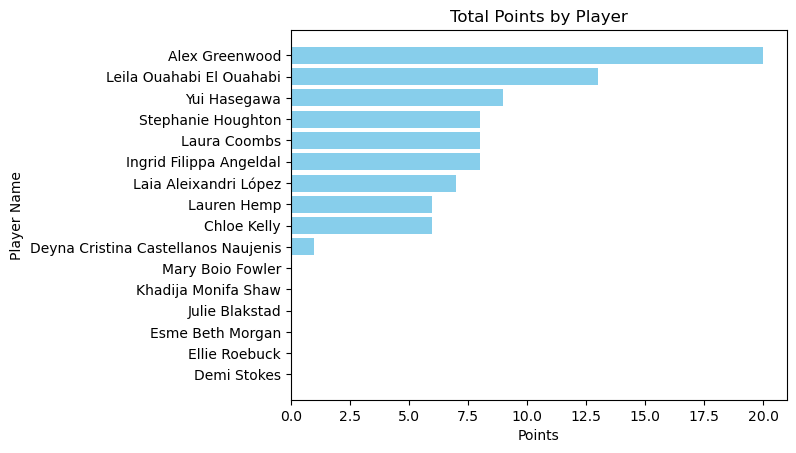

In [37]:
# Plot insights into a graph
points_sorted = points.sort_values('points', ascending=True)

plt.barh(points_sorted['player.name'], points_sorted['points'], color = '#87CEEB')
plt.xlabel('Points')
plt.ylabel('Player Name')
plt.title('Total Points by Player')
plt.show()

In [38]:
#Filter to only Alex Greenwood passing
greenwood = pd.DataFrame(play[play['player.name'] == "Alex Greenwood"])
sorted_greenwood = greenwood.sort_values('points', ascending=False)

# Drop rows where 'points' is 0
greenwood_final = sorted_greenwood.drop(sorted_greenwood[sorted_greenwood['points'] == 0].index)

greenwood_final

,player.name,points
364,Alex Greenwood,2
423,Alex Greenwood,2
721,Alex Greenwood,1
126,Alex Greenwood,1
864,Alex Greenwood,1
457,Alex Greenwood,1
347,Alex Greenwood,1
280,Alex Greenwood,1
414,Alex Greenwood,1
407,Alex Greenwood,1


In [39]:
index_array = greenwood_final.index.to_numpy()
print(index_array)

[364 423 721 126 864 457 347 280 414 407 136 727 376  98  96 361  65  63]


Text(0.5, 1.0, 'Alex Greenwood Passes vs Tottenham')

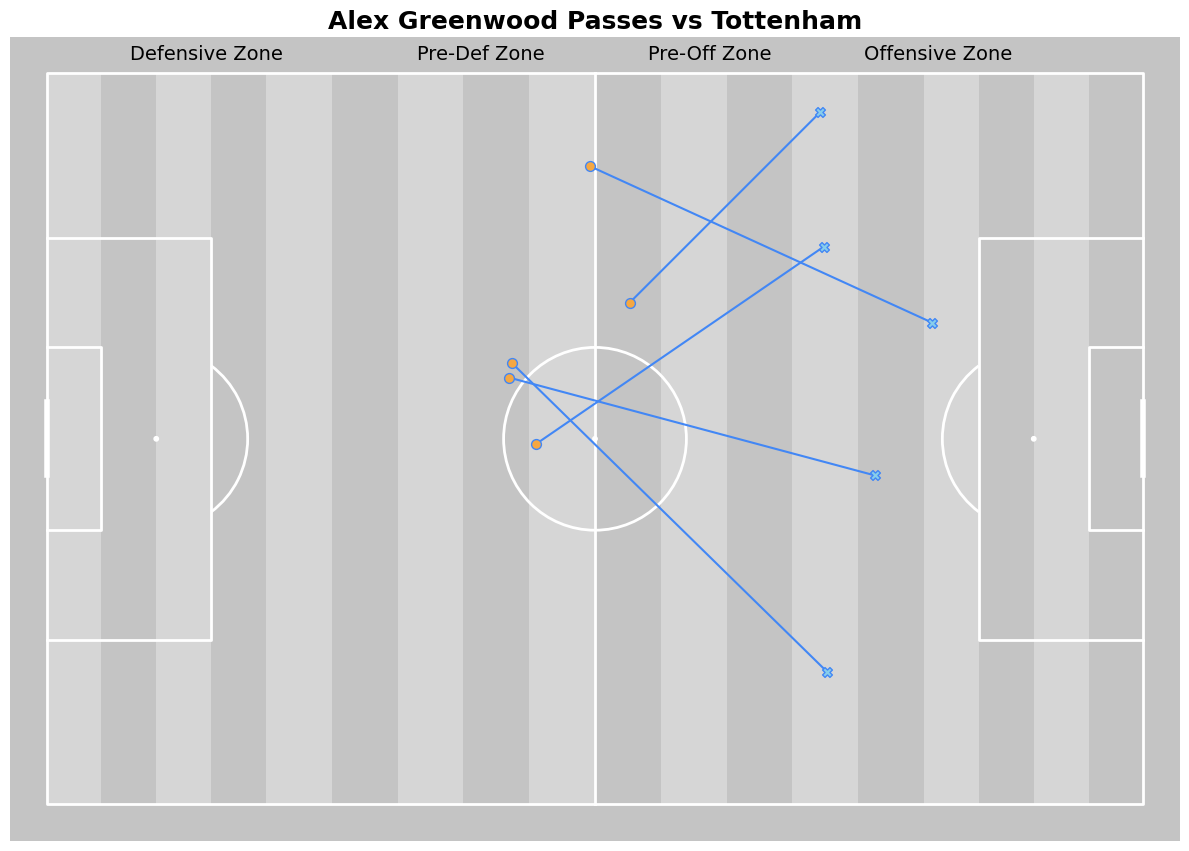

In [40]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#c4c4c4', line_color='white',
              stripe_color='#d6d6d6', stripe=True)

fig, ax = pitch.draw(figsize=(12, 10))

# define zones
zones = [0, 35, 60, 85, 110]
labels = ['Defensive Zone', 'Pre-Def Zone', 'Pre-Off Zone', 'Offensive Zone']

# add zone labels
for i in range(len(zones) - 1):
    x = (zones[i] + zones[i+1]) / 2
    y = -1.5
    ax.annotate(labels[i], xy=(x, y), ha='center', fontsize=14)

# Select a pass from the sorted df
for df_ix in [364, 423, 721, 126, 864]:
  sel_pass=man_city_df.loc[df_ix].to_dict()
  ax.scatter(sel_pass['loc_x'], sel_pass['loc_y'], marker='o', s=50, color='#f5a742', edgecolor='#4287f5', zorder=20000)
  ax.plot([sel_pass['loc_x'], sel_pass['pass_x']], [sel_pass['loc_y'], sel_pass['pass_y']], ls='-', color='#4287f5', zorder=10)
  ax.scatter(sel_pass['pass_x'], sel_pass['pass_y'], marker='X', s=50, color='#87CEEB', edgecolor='#4287f5', zorder=20000)  

ax.set_title('Alex Greenwood Passes vs Tottenham', fontsize=18, fontweight='bold')

### Conclusions

##### We want to know what Manchester City Women are doing with the ball when they are building from the back by:

* Once we analyzed Manchester City vs Tottenham and we came to a conclusion that Alex Greenwood accumilated the most "FPS".
* What this means is that Alex Greenwood is a player that is provides the most impact in the squad by moving the ball forward accross various zones into the offensive zone. 
* We then later filtered all of Greenwood's passing to filter out the top 5 most impactful passes of the match vs Tottenham

### Next Step

##### Additions we could incorporate into our notebook :

* Something we would like to further develop our notebook by adding off the ball coordinates to see positing and what allowed such a pass to be let through
* We would also like to be able to deploy this into an app from so we can see all action in correspondence to their point system
* Finally, we would like to tie this with video to filter out the exact action of the action